<h1>Data-Driven Car Price Prediction and Analysis

<h2>Importing Necssary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st 
import seaborn as sns
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data= pd.read_excel(r"C:\Users\Atharv\Downloads\car_price_prediction_.xlsx")

In [3]:
data

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


<h2>Understanding the data

In [ ]:
The data set about the cars and there price 

<h2>EDA(Exploratory Data Analysis)

In [4]:
data.shape

(2500, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [7]:
data.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [8]:
data.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [10]:
data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [11]:
data.sample()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
2187,2188,Ford,2021,3.4,Electric,Manual,224321,New,50984.36,Fiesta


In [12]:
data.tail()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5
2499,2500,Toyota,2005,4.6,Diesel,Automatic,80978,Used,16594.14,RAV4


<h3>Numeric_columns

In [18]:
numeric_columns=data.select_dtypes(["int64","float64"])
numeric_columns

,Car ID,Year,Engine Size,Mileage,Price
0,1,2016,2.3,114832,26613.92
1,2,2018,4.4,143190,14679.61
2,3,2013,4.5,181601,44402.61
3,4,2011,4.1,68682,86374.33
4,5,2009,2.6,223009,73577.10
...,...,...,...,...,...
2495,2496,2020,2.4,22650,61384.10
2496,2497,2001,5.7,77701,24710.35
2497,2498,2021,1.1,272827,29902.45
2498,2499,2002,4.5,229164,46085.67


In [21]:
numeric_columns.columns

Index(['Car ID', 'Year', 'Engine Size', 'Mileage', 'Price'], dtype='object')

<h3>Catrgorical_columns

In [26]:
categorical_columns=data.select_dtypes(["object"])
categorical_columns

,Brand,Fuel Type,Transmission,Condition,Model
0,Tesla,Petrol,Manual,New,Model X
1,BMW,Electric,Manual,Used,5 Series
2,Audi,Electric,Manual,New,A4
3,Tesla,Diesel,Automatic,New,Model Y
4,Ford,Diesel,Manual,Like New,Mustang
...,...,...,...,...,...
2495,Audi,Petrol,Automatic,Like New,Q5
2496,Audi,Hybrid,Manual,Like New,A3
2497,Ford,Hybrid,Manual,Like New,Fiesta
2498,Audi,Diesel,Manual,Like New,Q5


In [27]:
categorical_columns.columns

Index(['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'], dtype='object')

<h2>Cheacking Unique Values

In [28]:
data.nunique()

Car ID          2500
Brand              7
Year              24
Engine Size       51
Fuel Type          4
Transmission       2
Mileage         2490
Condition          3
Price           2499
Model             28
dtype: int64

In [29]:
numeric_columns.nunique()

Car ID         2500
Year             24
Engine Size      51
Mileage        2490
Price          2499
dtype: int64

In [30]:
categorical_columns.nunique()

Brand            7
Fuel Type        4
Transmission     2
Condition        3
Model           28
dtype: int64

<h2>Handling About null values

In [31]:
data.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [32]:
data.columns= data.columns.str.lower()
data.columns= data.columns.str.replace(' ','_')

<Axes: >

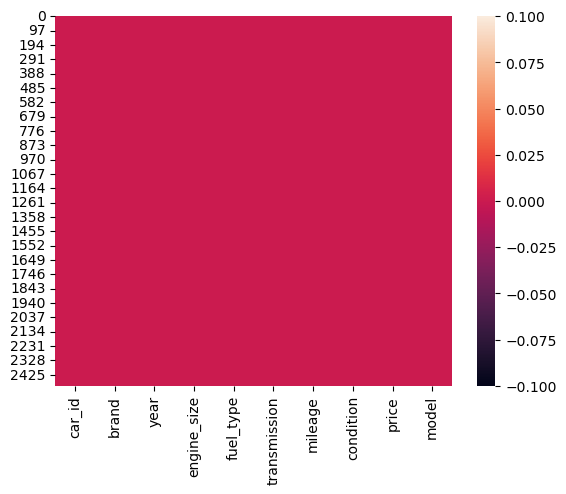

In [33]:
sns.heatmap(data.isnull())

<Axes: >

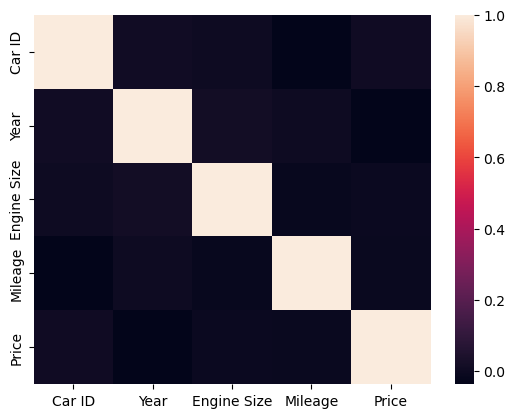

In [34]:
sns.heatmap(numeric_columns.corr())

<h2>Transfering the data from python to MY SQL

In [36]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [37]:
!pip install sqlalchemy pymysql

In [38]:
!pip install mysql-connector-python

In [39]:
pip install pymysql sqlalchemy mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [40]:
import mysql.connector as connector
import pandas as pd

In [41]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = "root"
password = quote_plus("atharv@5104")
host = "localhost"
port = "3306"
database = "Data_Driven_Car_Price_Prediction_and_Analysis"   # 🔥 must exist

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

engine.connect()
print("MySQL connected successfully")

data.to_sql("customer", engine, if_exists="replace", index=False)
print("Table created successfully")

MySQL connected successfully
Table created successfully
